In [1]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd

In [3]:
import numpy as np

In [4]:
sentiment = pd.read_csv("performance-sentiment-analysis/fear_greed_index.csv")

In [5]:
traders = pd.read_csv("performance-sentiment-analysis/historical_data.csv")

In [6]:
print("Sentiment Dataset Shape:", sentiment.shape)
print("Trade Dataset shape:", traders.shape)

Sentiment Dataset Shape: (2644, 4)
Trade Dataset shape: (211224, 16)


In [7]:
sentiment.head()

,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


In [8]:
traders.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12


In [9]:
sentiment.info()

<class 'pandas.DataFrame'>
RangeIndex: 2644 entries, 0 to 2643
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   timestamp       2644 non-null   int64
 1   value           2644 non-null   int64
 2   classification  2644 non-null   str  
 3   date            2644 non-null   str  
dtypes: int64(2), str(2)
memory usage: 82.8 KB


In [10]:
traders.info()

<class 'pandas.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Account           211224 non-null  str    
 1   Coin              211224 non-null  str    
 2   Execution Price   211224 non-null  float64
 3   Size Tokens       211224 non-null  float64
 4   Size USD          211224 non-null  float64
 5   Side              211224 non-null  str    
 6   Timestamp IST     211224 non-null  str    
 7   Start Position    211224 non-null  float64
 8   Direction         211224 non-null  str    
 9   Closed PnL        211224 non-null  float64
 10  Transaction Hash  211224 non-null  str    
 11  Order ID          211224 non-null  int64  
 12  Crossed           211224 non-null  bool   
 13  Fee               211224 non-null  float64
 14  Trade ID          211224 non-null  float64
 15  Timestamp         211224 non-null  float64
dtypes: bool(1), float64(8), int64(1

In [11]:
sentiment.duplicated().sum()

np.int64(0)

In [12]:
traders.duplicated().sum()

np.int64(0)

In [13]:
sentiment['classification'].unique()

<StringArray>
['Fear', 'Extreme Fear', 'Neutral', 'Greed', 'Extreme Greed']
Length: 5, dtype: str

In [14]:
traders['Side'].unique()

<StringArray>
['BUY', 'SELL']
Length: 2, dtype: str

In [15]:
sentiment['date'] = pd.to_datetime(sentiment['date'])

In [16]:
sentiment.info()

<class 'pandas.DataFrame'>
RangeIndex: 2644 entries, 0 to 2643
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   timestamp       2644 non-null   int64         
 1   value           2644 non-null   int64         
 2   classification  2644 non-null   str           
 3   date            2644 non-null   datetime64[us]
dtypes: datetime64[us](1), int64(2), str(1)
memory usage: 82.8 KB


In [17]:
traders['Timestamp IST'] = pd.to_datetime(traders['Timestamp IST'], dayfirst=True)

In [18]:
traders.info()

<class 'pandas.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Account           211224 non-null  str           
 1   Coin              211224 non-null  str           
 2   Execution Price   211224 non-null  float64       
 3   Size Tokens       211224 non-null  float64       
 4   Size USD          211224 non-null  float64       
 5   Side              211224 non-null  str           
 6   Timestamp IST     211224 non-null  datetime64[us]
 7   Start Position    211224 non-null  float64       
 8   Direction         211224 non-null  str           
 9   Closed PnL        211224 non-null  float64       
 10  Transaction Hash  211224 non-null  str           
 11  Order ID          211224 non-null  int64         
 12  Crossed           211224 non-null  bool          
 13  Fee               211224 non-null  float64       
 14  Trade ID       

In [19]:
traders['trade_date'] = traders['Timestamp IST'].dt.date

In [20]:
sentiment['date'] = pd.to_datetime(sentiment['date']).dt.date

In [21]:
df = traders.merge(
    sentiment[['date', 'classification', 'value']],
    left_on = 'trade_date',
    right_on = 'date',
    how='left'
)

In [22]:
df['classification'].isnull().sum()

np.int64(6)

In [23]:
df = df.dropna(subset=['classification'])

In [24]:
df['classification'].isnull().sum()

np.int64(0)

In [25]:
print("Traders row:", len(traders))

Traders row: 211224


In [26]:
print("Merged rows:", len(df))

Merged rows: 211218


In [27]:
df['classification'].value_counts()

classification
Fear             61837
Greed            50303
Extreme Greed    39992
Neutral          37686
Extreme Fear     21400
Name: count, dtype: int64

In [28]:
df.shape

(211218, 20)

In [29]:
df['win'] = df['Closed PnL'] > 0

In [30]:
df['abs_size'] = df['Size USD'].abs()

In [31]:
df['Direction'].unique()

<StringArray>
[                      'Buy',                      'Sell',
                 'Open Long',                'Close Long',
      'Spot Dust Conversion',                'Open Short',
               'Close Short',              'Long > Short',
              'Short > Long',         'Auto-Deleveraging',
 'Liquidated Isolated Short',                'Settlement']
Length: 12, dtype: str

In [32]:
df['Direction'].value_counts()

Direction
Open Long                    49895
Close Long                   48678
Open Short                   39741
Close Short                  36007
Sell                         19902
Buy                          16716
Spot Dust Conversion           142
Short > Long                    70
Long > Short                    57
Auto-Deleveraging                8
Liquidated Isolated Short        1
Settlement                       1
Name: count, dtype: int64

In [33]:
df['position_type'] = df['Direction'].map({
    'Open Long': 'Long',
    'Open Short': 'Short'
})

In [34]:
df['position_type'].value_counts(dropna=False)

position_type
NaN      121582
Long      49895
Short     39741
Name: count, dtype: int64

In [35]:
daily_pnl = df.groupby(['Account', 'trade_date'])['Closed PnL'].sum().reset_index()
daily_pnl.rename(columns={'Closed PnL':'daily_pnl'}, inplace=True)

In [36]:
daily_pnl = df.groupby(['Account', 'trade_date'])['Closed PnL'].sum().reset_index()
daily_pnl.rename(columns={'Closed PnL':'daily_pnl'}, inplace=True)

In [37]:
df['win'] = df['Closed PnL'] > 0

daily_win = df.groupby(['Account', 'trade_date'])['win'].mean().reset_index()
daily_win.rename(columns={'win':'daily_win_rate'}, inplace=True)

In [38]:
daily_trades = df.groupby(['Account', 'trade_date']).size().reset_index(name='trade_count')

In [39]:
df_directional = df[df['position_type'].notna()].copy()
df_directional['is_long'] = df_directional['position_type'] == 'Long'

In [40]:
daily_long_ratio = df_directional.groupby(['Account','trade_date'])['is_long'].mean().reset_index()
daily_long_ratio.rename(columns={'is_long':'long_ratio'}, inplace=True)

In [41]:
from functools import reduce

dfs = [daily_pnl, daily_win, daily_trades, daily_long_ratio]

daily_metrics = reduce(
    lambda left, right: pd.merge(left,right,on=['Account', 'trade_date'], how='left'),
    dfs
)

In [42]:
daily_sentiment = df[['Account', 'trade_date', 'classification']].drop_duplicates()

daily_metrics = daily_metrics.merge(
    daily_sentiment,
    on=['Account', 'trade_date'],
    how='left'
)

In [43]:
daily_metrics.head()

,Account,trade_date,daily_pnl,daily_win_rate,trade_count,long_ratio,classification
0,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-11,0.0,0.000000,177,0.0,Extreme Greed
1,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-17,0.0,0.000000,68,0.0,Extreme Greed
2,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-18,0.0,0.000000,40,0.0,Extreme Greed
3,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-22,-21227.0,0.000000,12,NaN,Extreme Greed
4,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-26,1603.1,0.444444,27,0.0,Extreme Greed


In [44]:
daily_metrics.describe()

,daily_pnl,daily_win_rate,trade_count,long_ratio
count,2340.000000,2340.000000,2340.000000,1791.000000
mean,4382.259380,0.359653,90.264103,0.510566
std,28411.103383,0.343419,214.650554,0.454369
min,-358963.139984,0.000000,1.000000,0.000000
25%,0.000000,0.000000,9.000000,0.000000
50%,206.352695,0.318182,29.000000,0.538462
75%,1842.763729,0.607357,80.000000,1.000000
max,533974.662903,1.000000,4083.000000,1.000000


In [45]:
daily_metrics.shape

(2340, 7)

In [46]:
daily_metrics['classification'].isnull().sum()

np.int64(0)

In [47]:
daily_metrics['long_ratio'].isnull().sum()

np.int64(549)

In [48]:
daily_metrics.describe()

,daily_pnl,daily_win_rate,trade_count,long_ratio
count,2340.000000,2340.000000,2340.000000,1791.000000
mean,4382.259380,0.359653,90.264103,0.510566
std,28411.103383,0.343419,214.650554,0.454369
min,-358963.139984,0.000000,1.000000,0.000000
25%,0.000000,0.000000,9.000000,0.000000
50%,206.352695,0.318182,29.000000,0.538462
75%,1842.763729,0.607357,80.000000,1.000000
max,533974.662903,1.000000,4083.000000,1.000000


In [49]:
sentiment_perf = daily_metrics.groupby('classification').agg({
    'daily_pnl':'mean',
    'daily_win_rate':'mean',
    'trade_count':'mean',
    'long_ratio':'mean'
}).reset_index()

sentiment_perf

,classification,daily_pnl,daily_win_rate,trade_count,long_ratio
0,Extreme Fear,4619.439053,0.329659,133.750000,0.644913
1,Extreme Greed,5161.922644,0.386387,76.030418,0.482081
2,Fear,5328.818161,0.364033,98.153968,0.554988
3,Greed,3318.100730,0.343559,77.628086,0.465845
4,Neutral,3438.618818,0.355414,100.228723,0.486477


In [50]:
from scipy import stats

groups = [
    daily_metrics[daily_metrics['classification'] ==s]['daily_pnl']
    for s in daily_metrics['classification'].unique()
]

f_stat, p_value = stats.f_oneway(*groups)

print("F-statistic:", f_stat)
print("p-value:", p_value)

F-statistic: 0.6072038169690501
p-value: 0.6574664430411926


In [51]:
groups_trades = [
    daily_metrics[daily_metrics['classification'] == s]['trade_count']
    for s in daily_metrics['classification'].unique()
]

f_stat_trades, p_trades = stats.f_oneway(*groups_trades)

print("Trade Count F-stat:", f_stat_trades)
print("Trade Count P-value:", p_trades)

Trade Count F-stat: 3.2087610926471704
Trade Count P-value: 0.01226697579119713


In [52]:
groups_long = [
    daily_metrics[daily_metrics["classification"] == s]['long_ratio'].dropna()
    for s in daily_metrics['classification'].unique()
]

f_stat_long, p_long = stats.f_oneway(*groups_long)

print("Long Ratio F-stat:", f_stat_long)
print("Long Ratio p-value:", p_long)

Long Ratio F-stat: 6.017652061686713
Long Ratio p-value: 8.275584282359727e-05


In [53]:
daily_metrics.groupby('classification')['daily_pnl'].std()

classification
Extreme Fear     29534.839183
Extreme Greed    27496.863832
Fear             31659.771538
Greed            30599.040173
Neutral          17447.863645
Name: daily_pnl, dtype: float64

In [54]:
risk_adjusted = daily_metrics.groupby('classification').agg({
    'daily_pnl':['mean','std']
})

risk_adjusted['sharpe_like'] = (
    risk_adjusted[('daily_pnl','mean')] /
    risk_adjusted[('daily_pnl','std')]
)

risk_adjusted

daily_pnl               sharpe_like
                       mean           std            
classification                                       
Extreme Fear    4619.439053  29534.839183    0.156406
Extreme Greed   5161.922644  27496.863832    0.187728
Fear            5328.818161  31659.771538    0.168315
Greed           3318.100730  30599.040173    0.108438
Neutral         3438.618818  17447.863645    0.197080

In [55]:
trader_activity = daily_metrics.groupby('Account')['trade_count'].mean().reset_index()
trader_activity.rename(columns={'trade_count':'avg_trades_per_day'}, inplace=True)

In [56]:
median_trades = trader_activity['avg_trades_per_day'].median()

trader_activity['activity_segment'] = trader_activity['avg_trades_per_day'].apply(
    lambda x: 'Frequent' if x > median_trades else 'Infrequent'
)

In [57]:
daily_metrics = daily_metrics.merge(
    trader_activity[['Account', 'activity_segment']],
    on='Account',
    how='left'
)

In [58]:
df.columns

Index(['Account', 'Coin', 'Execution Price', 'Size Tokens', 'Size USD', 'Side',
       'Timestamp IST', 'Start Position', 'Direction', 'Closed PnL',
       'Transaction Hash', 'Order ID', 'Crossed', 'Fee', 'Trade ID',
       'Timestamp', 'trade_date', 'date', 'classification', 'value', 'win',
       'abs_size', 'position_type'],
      dtype='str')

In [59]:
trader_consistency = daily_metrics.groupby('Account')['daily_pnl'].std().reset_index()
trader_consistency.rename(columns={'daily_pnl':'pnl_volatility'}, inplace=True)

In [60]:
median_vol = trader_consistency['pnl_volatility'].median()

trader_consistency['consistency_segment'] = trader_consistency['pnl_volatility'].apply(
    lambda x: 'Inconsistent' if x > median_vol else 'Consistent'
)

In [61]:
daily_metrics = daily_metrics.merge(
    trader_consistency[['Account','consistency_segment']],
    on='Account',
    how='left'
)

In [62]:
trader_exposure = df.groupby('Account')['Size USD'].mean().reset_index()
trader_exposure.rename(columns={'Size USD':'avg_trade_size_usd'}, inplace=True)

In [63]:
median_exposure = trader_exposure['avg_trade_size_usd'].median()

trader_exposure['exposure_segment'] = trader_exposure['avg_trade_size_usd'].apply(
    lambda x: 'High Exposure' if x > median_exposure else 'Low Exposure'
)

In [64]:
daily_metrics = daily_metrics.merge(
    trader_exposure[['Account','exposure_segment']],
    on='Account',
    how='left'
)

In [65]:
df.columns

Index(['Account', 'Coin', 'Execution Price', 'Size Tokens', 'Size USD', 'Side',
       'Timestamp IST', 'Start Position', 'Direction', 'Closed PnL',
       'Transaction Hash', 'Order ID', 'Crossed', 'Fee', 'Trade ID',
       'Timestamp', 'trade_date', 'date', 'classification', 'value', 'win',
       'abs_size', 'position_type'],
      dtype='str')

In [66]:
daily_metrics[['activity_segment',
               'exposure_segment',
               'consistency_segment']].drop_duplicates().head()

,activity_segment,exposure_segment,consistency_segment
0,Frequent,High Exposure,Inconsistent
24,Frequent,Low Exposure,Consistent
250,Infrequent,Low Exposure,Consistent
408,Infrequent,High Exposure,Consistent
436,Infrequent,High Exposure,Inconsistent


In [67]:
daily_metrics.groupby(
    ['exposure_segment','classification']
)['daily_pnl'].mean().unstack()

classification,Extreme Fear,Extreme Greed,Fear,Greed,Neutral
exposure_segment,,,,,
High Exposure,4464.064879,5967.496946,8382.998973,5415.341877,6302.680514
Low Exposure,4728.531559,4559.749162,2993.268129,1382.664538,1125.338217


In [68]:
daily_metrics.groupby(
    ['activity_segment','classification']
)['daily_pnl'].mean().unstack()

classification,Extreme Fear,Extreme Greed,Fear,Greed,Neutral
activity_segment,,,,,
Frequent,5406.205623,4340.279167,8672.944447,5494.049560,4130.277361
Infrequent,3727.770274,5800.361832,2249.775057,1942.374895,2891.879207


In [69]:
daily_metrics.groupby(
    ['consistency_segment','classification']
)['daily_pnl'].mean().unstack()

classification,Extreme Fear,Extreme Greed,Fear,Greed,Neutral
consistency_segment,,,,,
Consistent,171.450889,2520.649196,287.474060,1199.721059,554.109946
Inconsistent,8643.809296,11971.736499,10804.185265,6757.251531,7418.510806


In [70]:
daily_metrics = daily_metrics.sort_values(['Account','trade_date'])

daily_metrics['next_day_pnl'] = (
    daily_metrics.groupby('Account')['daily_pnl']
    .shift(-1)
)

daily_metrics['next_day_profitable'] = (
    daily_metrics['next_day_pnl'] > 0
).astype(int)

In [71]:
model_df = daily_metrics.dropna(subset=['next_day_profitable'])

In [72]:
model_df['next_day_profitable'].value_counts(normalize=True)

next_day_profitable
1    0.62265
0    0.37735
Name: proportion, dtype: float64

In [73]:
model_df = pd.get_dummies(
    model_df,
    columns=[
        'classification',
        'activity_segment',
        'exposure_segment',
        'consistency_segment'
    ],
    drop_first=True
)

In [74]:
features = [
    'daily_pnl',
    'daily_win_rate',
    'trade_count',
    'long_ratio'
] + [
    col for col in model_df.columns
    if 'classification_' in col
    or 'activity_segment_' in col
    or 'exposure_segment_' in col
    or 'consistency_segment_' in col
]

X = model_df[features]
y = model_df['next_day_profitable']

In [75]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [76]:
import sklearn

In [77]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    random_state=42,
    stratify=y
)

In [78]:
model_df['long_ratio'] = model_df['long_ratio'].fillna(0.5)

In [79]:
model_df.isnull().sum().sum()

np.int64(32)

In [80]:
model_df.isnull().sum()

Account                              0
trade_date                           0
daily_pnl                            0
daily_win_rate                       0
trade_count                          0
long_ratio                           0
next_day_pnl                        32
next_day_profitable                  0
classification_Extreme Greed         0
classification_Fear                  0
classification_Greed                 0
classification_Neutral               0
activity_segment_Infrequent          0
exposure_segment_Low Exposure        0
consistency_segment_Inconsistent     0
dtype: int64

In [81]:
model_df = model_df.dropna(subset=['next_day_pnl'])

In [82]:
model_df.isnull().sum().sum()

np.int64(0)

In [83]:
X = model_df[features]
y = model_df['next_day_profitable']

In [84]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    random_state=42,
    stratify=y
)

In [85]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

model = LogisticRegression(max_iter=2000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.6926406926406926

Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.39      0.49       256
           1       0.71      0.87      0.78       437

    accuracy                           0.69       693
   macro avg       0.67      0.63      0.63       693
weighted avg       0.68      0.69      0.67       693


Confusion Matrix:
 [[101 155]
 [ 58 379]]


In [86]:
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_[0]
})

coefficients.sort_values(by='Coefficient', ascending=False)

,Feature,Coefficient
1,daily_win_rate,0.844509
4,classification_Extreme Greed,0.248217
7,classification_Neutral,0.231604
3,long_ratio,0.218338
9,exposure_segment_Low Exposure,0.195120
6,classification_Greed,0.097994
2,trade_count,0.001163
0,daily_pnl,-0.000002
5,classification_Fear,-0.142735
10,consistency_segment_Inconsistent,-0.564701


In [87]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


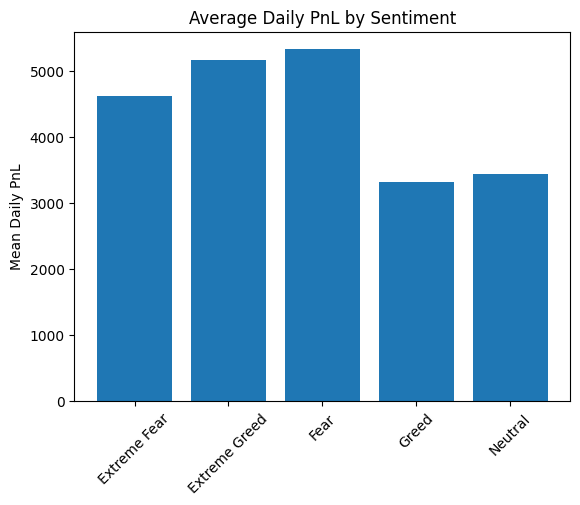

<Figure size 640x480 with 0 Axes>

In [88]:
import matplotlib.pyplot as plt

sentiment_perf = daily_metrics.groupby('classification').agg({
    'daily_pnl':'mean',
    'daily_win_rate':'mean'
}).reset_index()

plt.figure()
plt.bar(sentiment_perf['classification'], sentiment_perf['daily_pnl'])
plt.xticks(rotation=45)
plt.title("Average Daily PnL by Sentiment")
plt.ylabel("Mean Daily PnL")
plt.show()
plt.savefig("sentiment_vs_pnl.png", bbox_inches='tight', dpi=300)

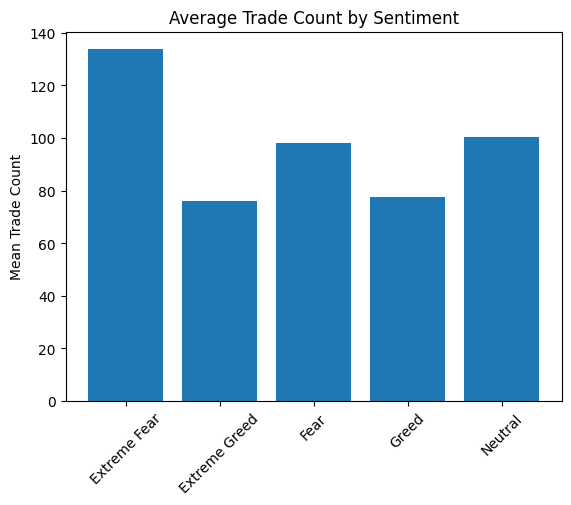

<Figure size 640x480 with 0 Axes>

In [89]:
activity = daily_metrics.groupby('classification')['trade_count'].mean().reset_index()

plt.figure()
plt.bar(activity['classification'], activity['trade_count'])
plt.xticks(rotation=45)
plt.title("Average Trade Count by Sentiment")
plt.ylabel("Mean Trade Count")
plt.show()
plt.savefig("Average Trade Count by Sentiment.png", bbox_inches='tight', dpi=300)

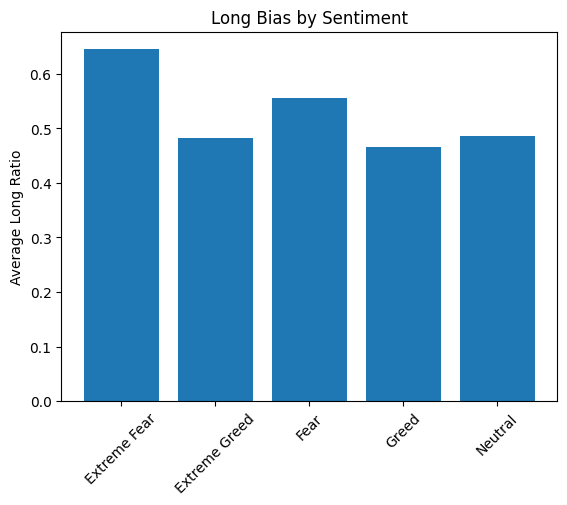

<Figure size 640x480 with 0 Axes>

In [90]:
long_bias = daily_metrics.groupby('classification')['long_ratio'].mean().reset_index()

plt.figure()
plt.bar(long_bias['classification'], long_bias['long_ratio'])
plt.xticks(rotation=45)
plt.title("Long Bias by Sentiment")
plt.ylabel("Average Long Ratio")
plt.show()
plt.savefig("Long Bias by Sentiment.png", bbox_inches='tight', dpi=300)

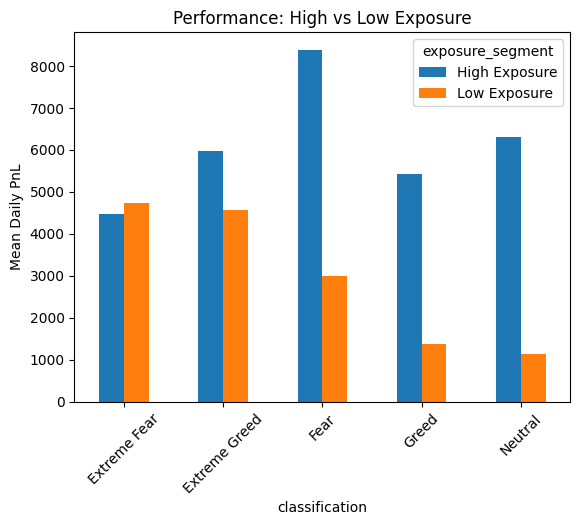

<Figure size 640x480 with 0 Axes>

In [91]:
segment_perf = daily_metrics.groupby(
    ['exposure_segment','classification']
)['daily_pnl'].mean().unstack()

segment_perf.T.plot(kind='bar')
plt.title("Performance: High vs Low Exposure")
plt.ylabel("Mean Daily PnL")
plt.xticks(rotation=45)
plt.show()
plt.savefig("High vs Low Exposure.png", bbox_inches='tight', dpi=300)

In [92]:
model_summary = pd.DataFrame({
    'Metric': ['Accuracy','Precision (Profitable)','Recall (Profitable)'],
    'Value': [
        0.6926,
        0.71,
        0.87
    ]
})

model_summary
model_summary.to_csv("model_summary_table.csv", index=False)

In [93]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


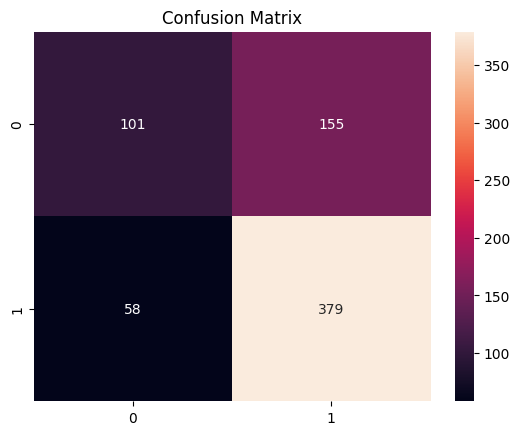

In [94]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

plt.figure()
sns.heatmap(cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.savefig("confusion_matrix.png", dpi=300, bbox_inches='tight')
plt.show()

In [95]:
print("Notebook executed successfully. Results are reproducible.")

Notebook executed successfully. Results are reproducible.
